# Frequency sweep

Some explanations about the problem from the collection
(...)

Definition of the structure properties

In [46]:
damping = 0.05
frequency = 8  # Hz

Definition of the structure response
$$
H = \frac{1}{\sqrt{(1-\gamma^2)^2 + 4\xi^4\gamma^4}}
$$
being $\gamma$ the ration between the forcing and the structure frequencies.

In [47]:
import numpy as np

def DynamicAmplification(forcing_frequency, xi=damping, omega=frequency):
    # using the structure properties by default
    gamma = forcing_frequency / omega
    return 1 / np.sqrt((1-gamma**2)**2 + 4*xi**2*gamma**2)

Now, we will define a frequency seep of forcing actions. For this purpose, we will define a range representing the domain of forcing frequencies and we will evaluate the structural response for each possible value of the forcing frequency.

In [48]:
forcing_frequencies = np.linspace(0, 24, 100)  # by default, the number of sampling points is 50
response = DynamicAmplification(forcing_frequencies)

Finally, the response can be plotted as a function of the forcing frequencies. Very often, the forcing frequency is expressed as an unitary frequency:

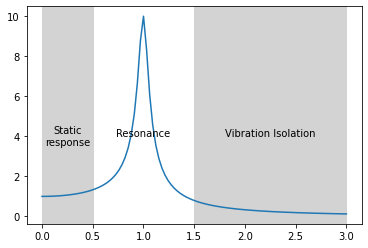

In [49]:
import matplotlib.pyplot as plt

unit_frequencies = forcing_frequencies / frequency
plt.axvspan(0,0.5,color='lightgrey')
plt.axvspan(1.5,3,color='lightgrey')
plt.text(0.25,4,'Static\nresponse',horizontalalignment='center',verticalalignment='center')
plt.text(1.00,4,'Resonance',horizontalalignment='center')
plt.text(2.25,4,'Vibration Isolation',horizontalalignment='center')
plt.plot(unit_frequencies,response)
plt.show()

## Influence of damping

When the structure is close to resonance, the response is governed by the damping. In the most unfavorable case $\Omega=\omega$ and $\gamma=1$, then, the dynamic magnification factor is reduced to the following expression:
$$
H = \frac{1}{2\xi}
$$

For the analysis of the influence of damping, we will define a set of structures with different damping ratio.

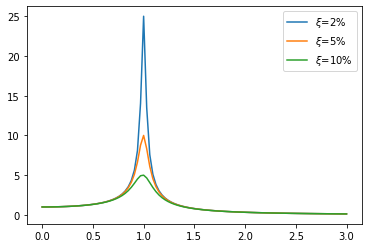

In [53]:
dampings = [0.02, 0.05, 0.1]
for damping in dampings:
    response = DynamicAmplification(forcing_frequencies, damping)
    plt.plot(unit_frequencies,response,label=fr'$\xi$={damping:.0%}')
    # note about the label format:
    # the 'f' leading character allows the replacement of variables inside the string
    # the 'r' character is allowing the special character '\' and thus, writing greek letters
    # the sequence '.0%' after the semicolon is telling gow to print (0 decimal places, percent format)
plt.legend()
plt.show()